# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [22]:
df=data.copy()
df.shape

(414, 7)

exploration

In [23]:
df.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

In [24]:
df.isnull().sum(0)

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [25]:
df.transaction_date.value_counts()

2013.417    58
2013.500    47
2013.083    46
2012.917    38
2013.250    32
2012.833    31
2012.667    30
2013.333    29
2013.000    28
2012.750    27
2013.167    25
2013.583    23
Name: transaction_date, dtype: int64

In [26]:
#modify dates types
df.transaction_date=df.transaction_date.astype(object)

In [27]:
df.dtypes

transaction_date             object
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

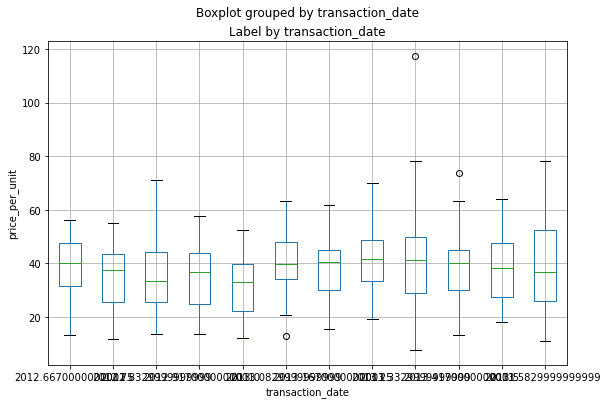

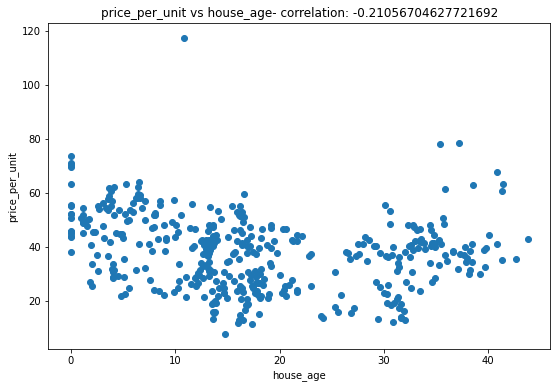

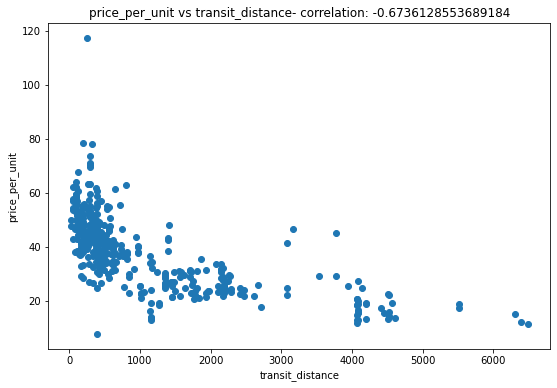

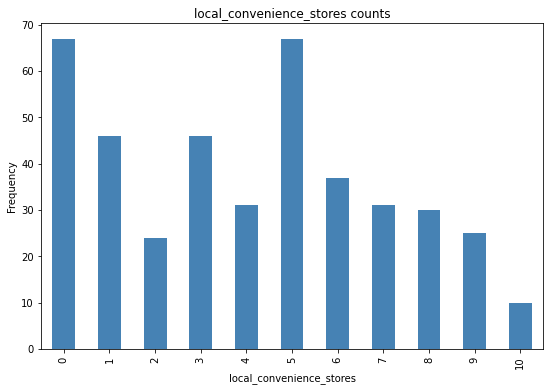

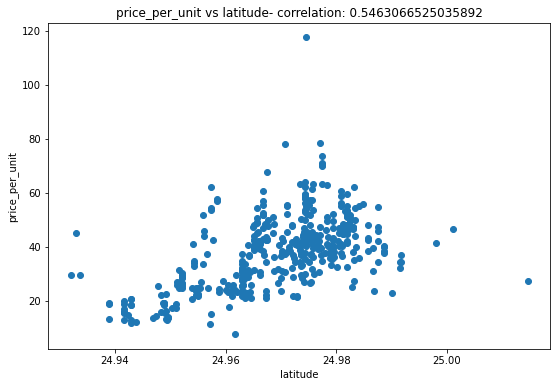

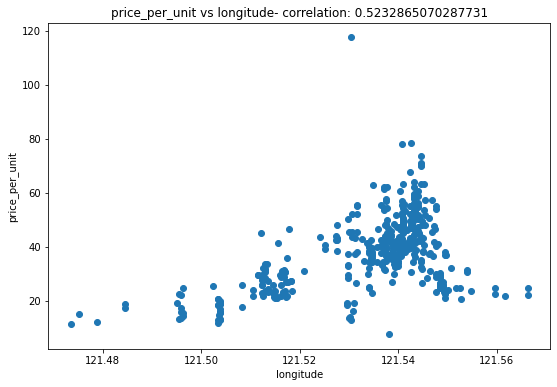

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

xv=[col for col in df][:6]

for col in xv:
    if  df[col].dtypes=="float64":
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        label = df['price_per_unit']
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('price_per_unit')
        ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
        
    elif df[col].dtypes=="int64":
        counts = df[col].value_counts().sort_index()
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        counts.plot.bar(ax = ax, color='steelblue')
        ax.set_title(col + ' counts')
        ax.set_xlabel(col) 
        ax.set_ylabel("Frequency")

        
    elif df[col].dtypes=="object":
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = 'price_per_unit', by = col, ax = ax)
        ax.set_title('Label by ' + col)
        ax.set_ylabel("price_per_unit")
plt.show()
   

In [41]:
#train and test split

from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[xv], df.price_per_unit, test_size=0.2, random_state=0)



In [85]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features1 = [2]
numeric_transformer1 = Pipeline(steps=[('poly',PolynomialFeatures(4)),
    ('scaler', StandardScaler())])

numeric_features = [1,3,4,5]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer1, numeric_features1),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num1',
                                                  Pipeline(memory=None,
                                                           steps=[('poly',
                                                                   PolynomialFeatures(degree=4,
                                                                                      include_bias=True,
                                                                                      interaction_only=False,
                                                                                      order='C')),
                                                                  ('scaler',
                                                                   St

In [86]:
# Get predictions
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 41.52192962714601
RMSE: 6.443751207731876
R2: 0.7609547174198759


In [91]:
pred=model.predict(X_test)
pred,y_test

(array([47.77662219, 19.61497495, 43.97385847, 19.47915491, 51.15416739,
        38.07878961, 44.13580912, 39.12931494, 49.26891387, 45.83051679,
        47.32555562, 41.87708154, 47.69419255, 44.61594721, 50.41090757,
        39.56557218, 37.78345703, 49.89650894, 38.78966889, 44.7973573 ,
        51.97209752, 26.20313642, 34.81770999, 50.32289745, 46.05981543,
        41.99274146, 42.01223111, 19.03206598, 49.8069948 , 26.78233066,
        46.03769859, 35.15011271, 49.01508233, 42.11388406, 40.80839643,
        25.90733458, 50.32086411, 32.82952295, 49.34869226, 14.25034165,
        48.73127519, 34.03656595, 27.89254894, 53.40619962, 20.51458746,
        41.90352142, 37.84539656, 16.80399454, 26.45119418, 53.40836829,
        57.86973379, 33.96983185, 46.76684658, 20.86628302, 27.07299622,
        34.42004789, 50.88422846, 40.13126976, 43.24719753, 33.58007484,
        40.22936233, 46.35615142, 43.65369763, 48.08967148, 39.29576215,
        24.16631729, 14.53944566, 30.14725152, 46.6

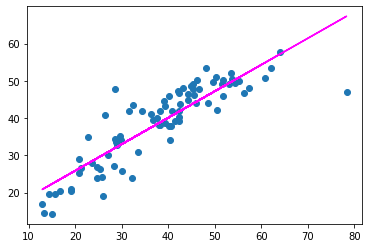

In [93]:
plt.scatter(y_test, pred)
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Your code to explore data and train a regression model

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [90]:
# Your code to use the trained model
x_new=[[2013.167 ,16.2,289.3248 ,5,24.98203,121.54348],[2013.000,13.6,4082.015,0,24.94155,121.50381]]
model.predict(x_new)

array([49.18500545, 18.04907906])